### Short variant signature 합치기

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

df_Dura = pd.read_csv ("/data/project/Meningioma/41.Signature/01.SigProfiler/11.matrix/Dura/output/SBS/Meningioma.SBS6.all", sep = "\t")
df_Tumor = pd.read_csv ("/data/project/Meningioma/41.Signature/01.SigProfiler/11.matrix/Tumor/output/SBS/Meningioma.SBS6.all", sep = "\t")
df_Shared = pd.read_csv ("/data/project/Meningioma/41.Signature/01.SigProfiler/11.matrix/Shared/output/SBS/Meningioma.SBS6.all", sep = "\t")
df_NatGen = pd.read_csv ("/data/project/Meningioma/99.Meningioma_public/NatGen/41.Signature/01.SigProfiler/11.matrix/output/SBS/NatGen.SBS6.all", sep = "\t" )

# 다 합치고 index name으로 넣어주기
df_abs = pd.merge ( df_Shared, pd.merge ( df_Tumor, pd.merge ( df_Dura, df_NatGen, left_on = "MutationType", right_on = "MutationType" ), left_on = "MutationType", right_on = "MutationType" ) , left_on = "MutationType", right_on = "MutationType" )  
df_abs.index = df_abs["MutationType"]
df_abs = df_abs.drop ( ["MutationType"], axis = 1)

# 백분율로 구하기
df_percentage = copy.deepcopy (df_abs)
for j in range ( df_abs.shape[1] ):
    for i in range (df_abs.shape[0]):
        df_percentage.iloc[i , j ] = ( int(df_percentage.iloc[i , j ]) / df_abs.iloc[:, j].sum ( axis = 0 ) ) * 100
df_percentage ["MutationType"] = df_percentage.index

df_long = pd.melt (df_percentage, id_vars = ["MutationType"], var_name = "TISSUE", value_name = "percentage")

### Indel signature 합치기

In [73]:
df_indel_Dura = pd.read_csv ("/data/project/Meningioma/41.Signature/01.SigProfiler/11.matrix/Dura/output/ID/Meningioma.ID28.all", sep = "\t")
df_indel_Tumor = pd.read_csv ("/data/project/Meningioma/41.Signature/01.SigProfiler/11.matrix/Tumor/output/ID/Meningioma.ID28.all", sep = "\t")
df_indel_Shared = pd.read_csv ("/data/project/Meningioma/41.Signature/01.SigProfiler/11.matrix/Shared/output/ID/Meningioma.ID28.all", sep = "\t")
df_indel_NatGen = pd.read_csv ("/data/project/Meningioma/99.Meningioma_public/NatGen/41.Signature/01.SigProfiler/11.matrix/output/ID/NatGen.ID28.all", sep = "\t" )

# 다 합치고 index name으로 넣어주기
#df_indel_abs = pd.merge ( df_indel_Shared, pd.merge ( df_indel_Tumor, pd.merge ( df_indel_Dura, df_indel_NatGen, left_on = "MutationType", right_on = "MutationType" ), left_on = "MutationType", right_on = "MutationType" ) , left_on = "MutationType", right_on = "MutationType" )  
df_indel_abs = pd.merge ( df_indel_Shared, pd.merge ( df_indel_Tumor, df_indel_Dura, left_on = "MutationType", right_on = "MutationType" ) , left_on = "MutationType", right_on = "MutationType" )  
df_indel_abs.index = df_indel_abs["MutationType"]
df_indel_abs = df_indel_abs.drop ( ["MutationType"], axis = 1)

df_indel_simplified = pd.DataFrame (columns = df_indel_abs.columns)

df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[:6].sum(axis=0)
df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[ 6:12 ].sum(axis=0)
df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[ 13:18 ].sum(axis=0)
df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[ 19:24 ].sum(axis=0)
df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[ 24 ]
df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[ 25 ]
df_indel_simplified.loc [ len(df_indel_simplified.index) ] = df_indel_abs.iloc[ 26 ]

df_indel_simplified.index = [ "Short_del (C)", "Short_del (T)", "Short_ins (C)", "Short_ins (T)", "Long_del", "Long_Ins", "Microhomology" ]

df_indel_simplified ["MutationType"] = df_indel_simplified.index
df_indel_long = pd.melt (df_indel_simplified, id_vars = ["MutationType"], var_name = "TISSUE", value_name = "percentage")


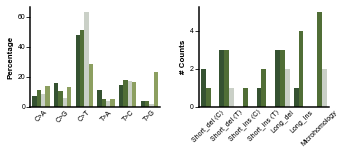

In [90]:
import warnings, palettable

warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = 'arial'
tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [ "#31572c", "#4f772d",  "#cad2c5", "#90a955", "#bde0fe"]
sns.set_palette(sns.color_palette(colorlist))


fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = ( 13 / 2.54 , 2.2 ))
fig.subplots_adjust ( wspace = 0.3, bottom = 0.27, top = 0.9, left = 0.14, right = 0.95)


sns.barplot( data = df_long, x = "MutationType", y = "percentage", hue = "TISSUE",
                linewidth = 0, edgecolor = 'black', ax = ax[0] )

sns.barplot( data = df_indel_long, x = "MutationType", y = "percentage", hue = "TISSUE",
                linewidth = 0, edgecolor = 'black', ax = ax[1] )
# sns.swarmplot( data = df_long, x = "MutationType", y = "percentage", hue = "MutationType", size = 11, 
#                 linewidth = 0.5, edgecolor = 'gray', ax = ax)


for ax_individual in [ ax[0], ax[1] ]:
    sns.despine ( top = True, right = True, ax = ax_individual )
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth( 1.5 )
    ax_individual.set_xlabel( None )
    ax_individual.set_xticklabels ( ax_individual.get_xticklabels(), fontsize = 7, fontweight = "normal" ) 
    ax_individual.tick_params(axis='x', direction='out', length = 0, pad = 2, rotation = 45)

    ax_individual.set_yticklabels ( ax_individual.get_yticklabels(), fontsize = 7, fontweight = "normal" ) 
    ax_individual.tick_params(axis = 'y', direction='out', length = 4, pad = 1)
    ax_individual.get_legend().remove()
    
    #ax_individual.xaxis.set_label_coords( 2.5,  5)   # ylabel을 왼쪽으로 살짝 이동

ax[0].set_ylabel( "Percentage", fontsize = 8, fontweight = "semibold" )
ax[1].set_ylabel( "# Counts", fontsize = 8, fontweight = "semibold" )


fig.savefig ( "/data/project/Meningioma/41.Signature/Signature_comparison.pdf", dpi = 300 )


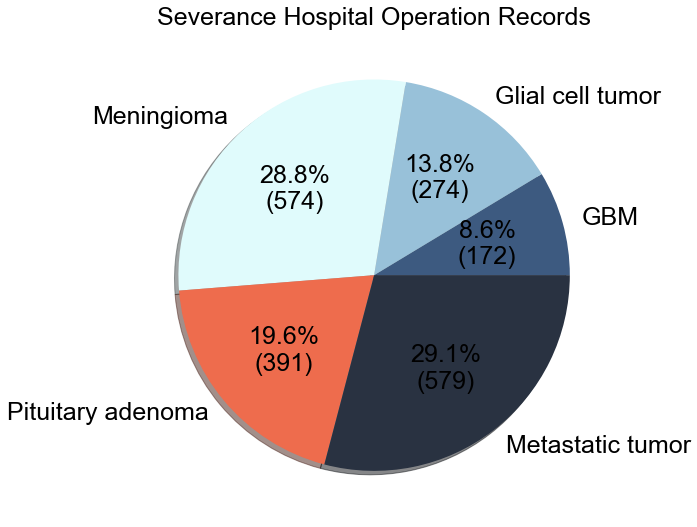

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import palettable

dict_NS = {"GBM" : 172, "Glial cell tumor": 274,  "Meningioma" : 574, "Pituitary adenoma" : 391, "Metastatic tumor" : 579}
df = pd.DataFrame.from_dict(dict_NS, orient='index', columns=['Number of Cases'])
df ["Disease"] = df.index

plt.rcParams["font.family"] = 'arial'
tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [ "#3D5A80", "#98C1D9",  "#E0FBFC", "#EE6C4D", "#293241"]
sns.set_palette(sns.color_palette(colorlist))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

fig, ax = plt.subplots( nrows = 1, ncols = 1, figsize = ( 9, 9 ))
plt.pie( df["Number of Cases"], labels = df["Disease"], colors = colorlist, 
        autopct = lambda pct: func(pct, df["Number of Cases"] ), textprops = { 'size': 25 },    # "%1.1f%%"
        shadow={'ox': -0.01, 'edgecolor': 'none', 'shade': 0.3})
ax.set_title("Severance Hospital Operation Records", fontsize = 25)
plt.show()

fig.savefig  ( "/data/project/Meningioma/script/41.Signature/Severance Hospital Operation Records.pdf", dpi = 300)
